# DSO105 L1 - Hands-on helper

## Imports

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
from scipy import stats
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Load and View Data

In [ ]:
anime = pd.read_csv('C:/Users/meredith.dodd/Documents/Data Science/105 Intermediate Statistics/Lesson 1/anime.csv')

In [ ]:
pd.options.display.max_columns = None
anime.head(2)

anime_id             title              title_english title_japanese  \
0     11013     Inu x Boku SS  Inu X Boku Secret Service         妖狐×僕SS   
1      2104  Seto no Hanayome      My Bride is a Mermaid          瀬戸の花嫁   

         title_synonyms                                          image_url  \
0       Youko x Boku SS  https://myanimelist.cdn-dena.com/images/anime/...   
1  The Inland Sea Bride  https://myanimelist.cdn-dena.com/images/anime/...   

  type source  episodes           status  airing  \
0   TV  Manga        12  Finished Airing   False   
1   TV  Manga        26  Finished Airing   False   

                   aired_string                                       aired  \
0  Jan 13, 2012 to Mar 30, 2012  {'from': '2012-01-13', 'to': '2012-03-30'}   
1    Apr 2, 2007 to Oct 1, 2007  {'from': '2007-04-02', 'to': '2007-10-01'}   

          duration                     rating  score  scored_by    rank  \
0  24 min. per ep.  PG-13 - Teens 13 or older   7.63     139250  1274.0   
1  24 min. per ep.  PG-13 - Teens 13 or older   7.89      91206   727.0   

   popularity  members  favorites  \
0         231   283882       2809   
1         366   204003       2579   

                                          background    premiered  \
0  Inu x Boku SS was licensed by Sentai Filmworks...  Winter 2012   
1                                                NaN  Spring 2007   

            broadcast                                            related  \
0  Fridays at Unknown  {'Adaptation': [{'mal_id': 17207, 'type': 'man...   
1             Unknown  {'Adaptation': [{'mal_id': 759, 'type': 'manga...   

                                            producer          licensor  \
0  Aniplex, Square Enix, Mainichi Broadcasting Sy...  Sentai Filmworks   
1                  TV Tokyo, AIC, Square Enix, Sotsu        Funimation   

             studio                                     genre  \
0  David Production    Comedy, Supernatural, Romance, Shounen   
1             Gonzo  Comedy, Parody, Romance, School, Shounen   

                        opening_theme  \
0               ['"Nirvana" by MUCC']   
1  ['"Romantic summer" by SUN&LUNAR']   

                                        ending_theme  duration_min  \
0  ['#1: "Nirvana" by MUCC (eps 1, 11-12)', '#2: ...          24.0   
1  ['#1: "Ashita e no Hikari (明日への光)" by Asuka Hi...          24.0   

   aired_from_year  
0             2012  
1             2007

## Part 1: Is a rating score of 6.2 different from the mean for anime? 

### Check for Assumptions

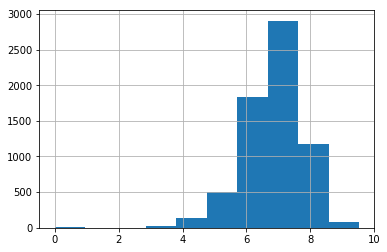

In [ ]:
anime['score'].hist()

### Run a Single Sample t-Test

In [ ]:
stats.ttest_1samp(anime['score'], 6.2)

Ttest_1sampResult(statistic=57.14153988539698, pvalue=0.0)

### Examine the means

In [ ]:
anime.score.mean()

6.848998200359939

## Part 2 - Does anime that is still airing differ in popularity from anime that is no longer airing?

### Check for assumptions

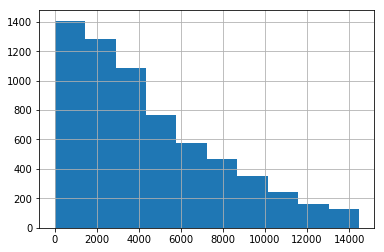

In [ ]:
anime.popularity[anime.status == "Finished Airing"].hist()

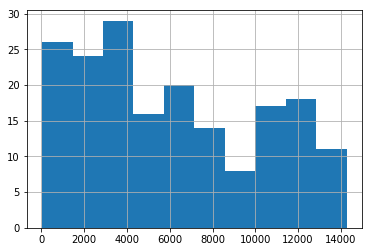

In [ ]:
anime.popularity[anime.status == "Currently Airing"].hist()

### Run an independent t-test

In [ ]:
ttest_ind(anime.popularity[anime.status == 'Finished Airing'], anime.popularity[anime.status == 'Currently Airing'])

Ttest_indResult(statistic=-6.489071311277514, pvalue=9.256789141747445e-11)

### Examine the means

In [ ]:
anime.popularity[anime.status == "Finished Airing"].mean()

4433.558057054742

In [ ]:
anime.popularity[anime.status == "Currently Airing"].mean()

6108.131147540984

## Part 3 - Determine whether the source of the anime influences the type 

### Recode source

In [ ]:
def source (series):
    if series == "4-koma manga" :
        return "Manga"
    if series == "Digital manga": 
        return "Manga"
    if series == "Manga": 
        return "Manga"
    if series == "Web Manga": 
        return "Manga"
    if series == "Book": 
        return "Book"
    if series == "Light novel": 
        return "Book"
    if series == "Novel": 
        return "Book"
    if series == "Picture book": 
        return "Book"
    if series == "Visual novel": 
        return "Book"
    if series == "Card game": 
        return "Game"
    if series == "Game": 
        return "Game"
    if series == "Music": 
        return "Listening"
    if series == "Radio": 
        return "Listening"
    if series == "Other": 
        return "Other"
    if series == "Original": 
        return "Other"
    
anime['sourceR'] = anime['source'].apply(source)

In [ ]:
anime.head(2)

anime_id             title              title_english title_japanese  \
0     11013     Inu x Boku SS  Inu X Boku Secret Service         妖狐×僕SS   
1      2104  Seto no Hanayome      My Bride is a Mermaid          瀬戸の花嫁   

         title_synonyms                                          image_url  \
0       Youko x Boku SS  https://myanimelist.cdn-dena.com/images/anime/...   
1  The Inland Sea Bride  https://myanimelist.cdn-dena.com/images/anime/...   

  type source  episodes           status  airing  \
0   TV  Manga        12  Finished Airing   False   
1   TV  Manga        26  Finished Airing   False   

                   aired_string                                       aired  \
0  Jan 13, 2012 to Mar 30, 2012  {'from': '2012-01-13', 'to': '2012-03-30'}   
1    Apr 2, 2007 to Oct 1, 2007  {'from': '2007-04-02', 'to': '2007-10-01'}   

          duration                     rating  score  scored_by    rank  \
0  24 min. per ep.  PG-13 - Teens 13 or older   7.63     139250  1274.0   
1  24 min. per ep.  PG-13 - Teens 13 or older   7.89      91206   727.0   

   popularity  members  favorites  \
0         231   283882       2809   
1         366   204003       2579   

                                          background    premiered  \
0  Inu x Boku SS was licensed by Sentai Filmworks...  Winter 2012   
1                                                NaN  Spring 2007   

            broadcast                                            related  \
0  Fridays at Unknown  {'Adaptation': [{'mal_id': 17207, 'type': 'man...   
1             Unknown  {'Adaptation': [{'mal_id': 759, 'type': 'manga...   

                                            producer          licensor  \
0  Aniplex, Square Enix, Mainichi Broadcasting Sy...  Sentai Filmworks   
1                  TV Tokyo, AIC, Square Enix, Sotsu        Funimation   

             studio                                     genre  \
0  David Production    Comedy, Supernatural, Romance, Shounen   
1             Gonzo  Comedy, Parody, Romance, School, Shounen   

                        opening_theme  \
0               ['"Nirvana" by MUCC']   
1  ['"Romantic summer" by SUN&LUNAR']   

                                        ending_theme  duration_min  \
0  ['#1: "Nirvana" by MUCC (eps 1, 11-12)', '#2: ...          24.0   
1  ['#1: "Ashita e no Hikari (明日への光)" by Asuka Hi...          24.0   

   aired_from_year sourceR  
0             2012   Manga  
1             2007   Manga

### Make a contingency table

In [ ]:
anime_crosstab = pd.crosstab(anime['sourceR'], anime['type'])

In [ ]:
anime_crosstab

type       Movie  Music  ONA  OVA  Special    TV
sourceR                                         
Book         163      2   62  389      174   584
Game          83      9   39   57       72   210
Listening      2     42    0    1        1    14
Manga        333     12   93  609      376  1271
Other        325     33  185  283      289   844

### Run an independent chi-square

In [ ]:
stats.chi2_contingency(anime_crosstab)

(2164.1608183289673,
 0.0,
 20,
 array([[1.89849626e+02, 2.05356108e+01, 7.94183316e+01, 2.80583499e+02,
         1.91106909e+02, 6.12506024e+02],
        [6.49412841e+01, 7.02455391e+00, 2.71663871e+01, 9.59783438e+01,
         6.53713589e+01, 2.09518072e+02],
        [8.29037670e+00, 8.96751563e-01, 3.46804941e+00, 1.22525545e+01,
         8.34527985e+00, 2.67469880e+01],
        [3.72237914e+02, 4.02641452e+01, 1.55715419e+02, 5.50139698e+02,
         3.74703065e+02, 1.20093976e+03],
        [2.70680799e+02, 2.92789385e+01, 1.13231813e+02, 4.00045905e+02,
         2.72473387e+02, 8.73289157e+02]]))

## How do the variables score, scored_by, rank, popularity, members, and favorites all relate to each other? 

### Remove anything that isn't continuous

In [ ]:
anime2 = anime[['score', 'scored_by', 'rank', 'popularity', 'members', 'favorites']]

### View your data

In [ ]:
anime2.head(2)

score  scored_by    rank  popularity  members  favorites
0   7.63     139250  1274.0         231   283882       2809
1   7.89      91206   727.0         366   204003       2579

### Correlation Time

In [ ]:
anime2.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)